<a href="https://colab.research.google.com/github/LTNguyen174/6351071050_Lab3/blob/main/6351071050_LAB3_Bai3(trang7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

câu a, b, c)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout


(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print("Đã tải xong dữ liệu MNIST.\n")


print(f"Train images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test images shape:  {test_images.shape}")
print(f"Test labels shape:  {test_labels.shape}\n")

print("Lý Thanh Nguyên - 6351071050")
train_images = train_images / 255.0
test_images = test_images / 255.0


Đã tải xong dữ liệu MNIST.

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape:  (10000, 28, 28)
Test labels shape:  (10000,)

Lý Thanh Nguyên - 6351071050


câu d)

In [13]:
def create_model():
    model = Sequential()
    # Flatten layer: 28x28 -> 784
    model.add(Flatten(input_shape=(28, 28)))
    # Dense layer: 128 neurons, Relu
    model.add(Dense(128, activation='relu'))
    # Dropout layer: 20%
    model.add(Dropout(0.2))
    # Output layer: 10 neurons, Softmax
    model.add(Dense(10, activation='softmax'))

    # Biên dịch mô hình
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model
    print("Lý Thanh Nguyên - 6351071050")

câu e)

In [14]:
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Mảng để lưu trữ kết quả và mô hình
accuracy_per_fold = []
loss_per_fold = []
models = []

fold_no = 1
for train_index, val_index in kfold.split(train_images):
    print(f'Training for Fold {fold_no} ...')

    # Chia dữ liệu theo index của fold hiện tại
    X_train_fold = train_images[train_index]
    y_train_fold = train_labels[train_index]
    X_val_fold = train_images[val_index]
    y_val_fold = train_labels[val_index]

    # Tạo mới mô hình (Reset weights cho mỗi fold)
    model = create_model()

    # Huấn luyện
    # verbose=0 để gọn màn hình, bạn có thể chỉnh thành 1 để theo dõi chi tiết
    history = model.fit(X_train_fold, y_train_fold,
                        validation_data=(X_val_fold, y_val_fold),
                        batch_size=32,
                        epochs=5,
                        verbose=0)

    # Đánh giá trên tập validation của fold này
    scores = model.evaluate(X_val_fold, y_val_fold, verbose=0)

    # Lưu thông tin
    loss_per_fold.append(scores[0])
    accuracy_per_fold.append(scores[1])
    models.append(model)

    print(f' -> Score for fold {fold_no}: Loss of {scores[0]:.4f}; Accuracy of {scores[1]*100:.2f}%')
    fold_no += 1

print("\nĐã hoàn thành huấn luyện K-Fold.\n")
print("Lý Thanh Nguyên - 6351071050")

Training for Fold 1 ...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


 -> Score for fold 1: Loss of 0.0677; Accuracy of 97.98%
Training for Fold 2 ...
 -> Score for fold 2: Loss of 0.0882; Accuracy of 97.47%
Training for Fold 3 ...
 -> Score for fold 3: Loss of 0.0873; Accuracy of 97.38%
Training for Fold 4 ...
 -> Score for fold 4: Loss of 0.0762; Accuracy of 97.78%
Training for Fold 5 ...
 -> Score for fold 5: Loss of 0.0987; Accuracy of 97.25%
Training for Fold 6 ...
 -> Score for fold 6: Loss of 0.0787; Accuracy of 97.72%
Training for Fold 7 ...
 -> Score for fold 7: Loss of 0.0852; Accuracy of 97.37%
Training for Fold 8 ...
 -> Score for fold 8: Loss of 0.0798; Accuracy of 97.58%
Training for Fold 9 ...
 -> Score for fold 9: Loss of 0.0840; Accuracy of 97.55%
Training for Fold 10 ...
 -> Score for fold 10: Loss of 0.0867; Accuracy of 97.43%

Đã hoàn thành huấn luyện K-Fold.

Lý Thanh Nguyên - 6351071050


câu f)

In [15]:
mean_acc = np.mean(accuracy_per_fold)
std_acc = np.std(accuracy_per_fold)
mean_loss = np.mean(loss_per_fold)
std_loss = np.std(loss_per_fold)

print(f"Mean Accuracy: {mean_acc*100:.2f}% (+/- {std_acc*100:.2f}%)")
print(f"Mean Loss:     {mean_loss:.4f} (+/- {std_loss:.4f})\n")
print("Lý Thanh Nguyên - 6351071050")

Mean Accuracy: 97.55% (+/- 0.21%)
Mean Loss:     0.0833 (+/- 0.0079)

Lý Thanh Nguyên - 6351071050


câu g)

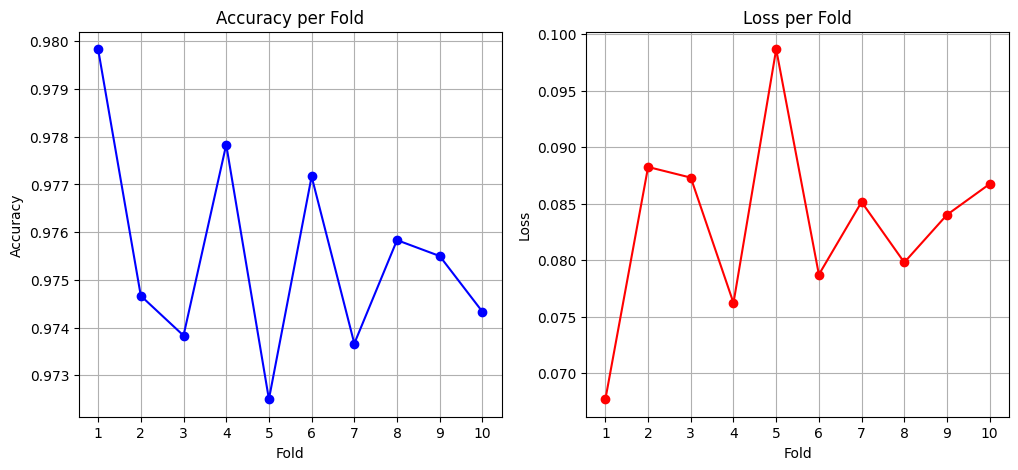

Lý Thanh Nguyên - 6351071050


In [16]:
plt.figure(figsize=(12, 5))

# Biểu đồ Accuracy
plt.subplot(1, 2, 1)
plt.plot(range(1, num_folds+1), accuracy_per_fold, marker='o', linestyle='-', color='b')
plt.title('Accuracy per Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(range(1, num_folds+1))
plt.grid(True)

# Biểu đồ Loss
plt.subplot(1, 2, 2)
plt.plot(range(1, num_folds+1), loss_per_fold, marker='o', linestyle='-', color='r')
plt.title('Loss per Fold')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.xticks(range(1, num_folds+1))
plt.grid(True)

plt.show()
print("Lý Thanh Nguyên - 6351071050")

câu h)

In [17]:
best_index = np.argmax(accuracy_per_fold)
best_model = models[best_index]
best_acc_fold = accuracy_per_fold[best_index]

print(f"Mô hình tốt nhất là ở Fold {best_index + 1} với Val Accuracy: {best_acc_fold:.4f}")
print("Lý Thanh Nguyên - 6351071050")

Mô hình tốt nhất là ở Fold 1 với Val Accuracy: 0.9798
Lý Thanh Nguyên - 6351071050


câu i)

In [18]:
y_pred_probs = best_model.predict(test_images)
y_pred = np.argmax(y_pred_probs, axis=1)

test_acc = accuracy_score(test_labels, y_pred)
print(f"Accuracy trên tập Test: {test_acc:.4f}\n")
print("Lý Thanh Nguyên - 6351071050")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy trên tập Test: 0.9776

Lý Thanh Nguyên - 6351071050


câu j)

In [19]:
target_names = [str(i) for i in range(10)]
print("Lý Thanh Nguyên - 6351071050")
print(classification_report(test_labels, y_pred, target_names=target_names))

Lý Thanh Nguyên - 6351071050
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.99      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.99      0.96      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



câu k)

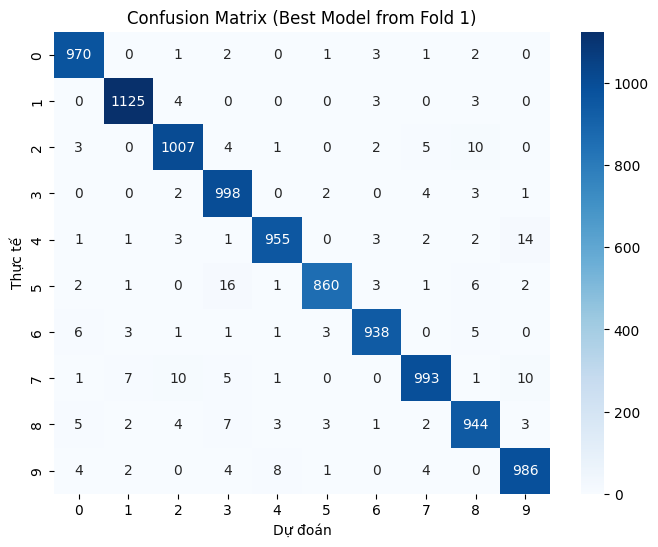

Lý Thanh Nguyên - 6351071050


In [20]:
cm = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title(f'Confusion Matrix (Best Model from Fold {best_index + 1})')
plt.ylabel('Thực tế')
plt.xlabel('Dự đoán')
plt.show()
print("Lý Thanh Nguyên - 6351071050")

câu l)

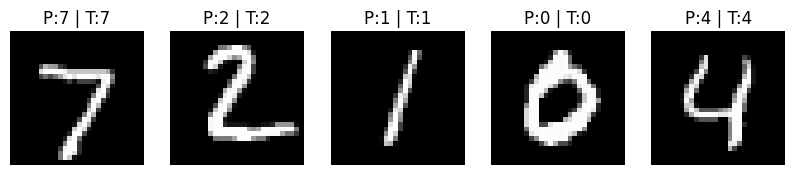

Lý Thanh Nguyên - 6351071050


In [21]:
plt.figure(figsize=(10, 2))
for i in range(5):
    img = test_images[i]
    # Thêm chiều batch
    img_expanded = np.expand_dims(img, axis=0)

    # Dự đoán bằng mô hình tốt nhất
    pred_prob = best_model.predict(img_expanded, verbose=0)
    pred_label = np.argmax(pred_prob)
    true_label = test_labels[i]

    # Hiển thị
    plt.subplot(1, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"P:{pred_label} | T:{true_label}")
    plt.axis('off')

plt.show()
print("Lý Thanh Nguyên - 6351071050")